In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
%matplotlib inline

In [126]:
data = pd.read_csv('annotations.csv', header=1, nrows=39)
info_cols = ['author', 'title', 'year', 'name']
goals_cols = ['part of writing process supported',
              'level of constraint in goal being supported',
              'size of goal being supported']

In [136]:
data_goals = data[data['tool is contribution'] == 'yes']
data_goals = data_goals[info_cols + goals_cols].drop_duplicates().dropna(how='any')
data_goals = data_goals[(data_goals['part of writing process supported'] != 'all') & (data_goals['part of writing process supported'] != 'unclear')]

constraint = 'level of constraint in goal being supported'
part = 'part of writing process supported'
size = 'size of goal being supported'

part_d = {'planning/ideation': 3, 'implementation/translation': 2, 'reviewing/evaluation': 1}
data_goals['part'] = data_goals.apply(lambda x: part_d[x['part of writing process supported']], axis=1)
data_goals['part jitter'] = data_goals.apply(lambda x: x['part'] + random.uniform(-.3,.3), axis=1)

data_goals
# x = 'part of writing process supported'
# ax = sns.histplot(data=data_goals, x=x)
# ax.set_xticklabels(labels=data_goals[x].unique(), rotation=45)

,author,title,year,name,part of writing process supported,level of constraint in goal being supported,size of goal being supported,part,part jitter
0,"Gero, Katy Ilonka and Chilton, Lydia B.",Metaphoria: An Algorithmic Companion for Metap...,2019,Metaphoria,planning/ideation,4.0,sentence,3,2.988628
2,"Gero, Katy Ilonka and Chilton, Lydia B.","How a Stylistic, Machine-Generated Thesaurus I...",2019,Style Thesaurus,planning/ideation,4.0,word,3,2.793190
3,"Guarneri, Andrea and Ripamonti, Laura A. and T...",GHOST: A GHOst STory-Writer,2017,GHOST,planning/ideation,2.0,more than paragraph,3,3.087234
4,"Gon\c{c}alves, Frederica and Caraban, Ana and ...",What Shall I Write Next? Subliminal and Supral...,2017,Liminal Triggers,implementation/translation,1.0,paragraph,2,2.001024
5,"Huang, Chieh-Yang and Huang, Shih-Hong and Hua...",Heteroglossia: In-Situ Story Ideation with the...,2020,Heteroglossia,planning/ideation,3.0,paragraph,3,3.094998
6,"Osone, Hiroyuki and Lu, Jun-Li and Ochiai, Yoichi",BunCho: AI Supported Story Co-Creation via Uns...,2021,BunCho,planning/ideation,1.0,word,3,2.850025
7,"Osone, Hiroyuki and Lu, Jun-Li and Ochiai, Yoichi",BunCho: AI Supported Story Co-Creation via Uns...,2021,BunCho,planning/ideation,1.0,unclear,3,3.228612
8,"Resch, Olaf and Yankova, Aglika",Open Knowledge Interface: A Digital Assistant ...,2019,OKI,planning/ideation,1.0,writing experience,3,3.009162
9,"Clark, Elizabeth and Ross, Anne Spencer and Ta...",Creative Writing with a Machine in the Loop: C...,2018,Stories,planning/ideation,1.0,sentence,3,2.704082
10,"Clark, Elizabeth and Ross, Anne Spencer and Ta...",Creative Writing with a Machine in the Loop: C...,2018,Slogans,planning/ideation,4.0,sentence,3,2.799240


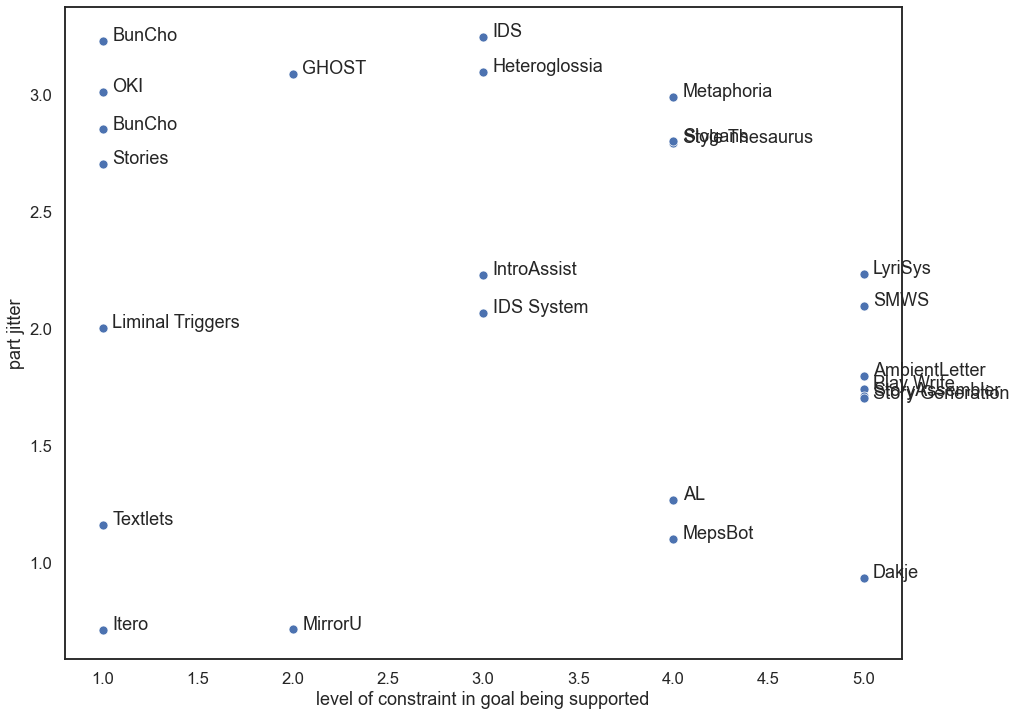

In [137]:
sns.set(rc = {'figure.figsize':(15,12)})
sns.set_theme(style="white", palette=None, context="talk")
ax = sns.scatterplot(data=data_goals, x=constraint, y='part jitter')

for i in range(data_goals.shape[0]):
    plt.text(x=data_goals[constraint].iloc[i]+0.05,
             y=data_goals['part jitter'].iloc[i],
             s=data_goals['name'].iloc[i])

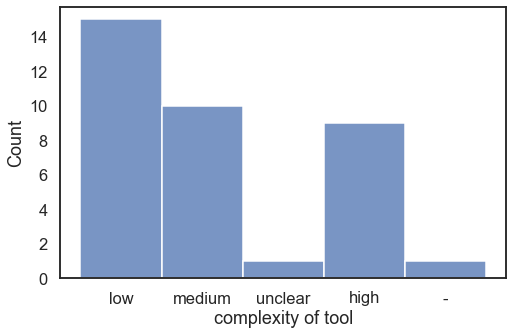

In [138]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.set_theme(style="white", palette=None, context="talk")

col = 'complexity of tool'
locdf = data[info_cols + [col]]
ax = sns.histplot(data=locdf, x=col)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

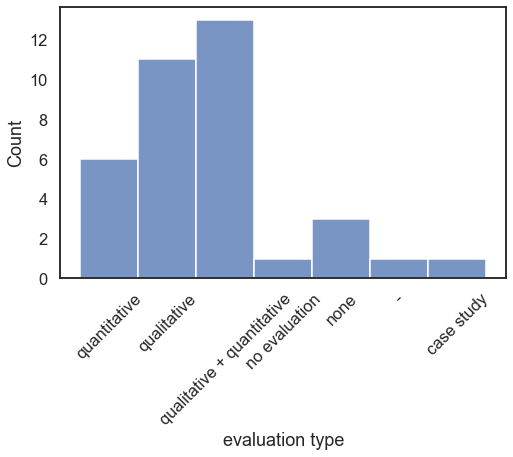

In [139]:
col = 'evaluation type'
locdf = data[info_cols + [col]]
ax = sns.histplot(data=locdf, x=col)
plt.xticks(rotation=45)

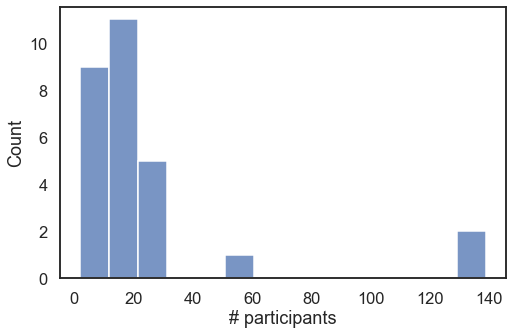

In [140]:
col = '# participants'
locdf = data[info_cols + [col]].dropna(how='any')
locdf = locdf[locdf[col] != '-']
locdf[col] = locdf[col].apply(pd.to_numeric)
ax = sns.histplot(data=locdf, x=col)